# Using the hillmaker CLI

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import hillmaker as hm

## Running hillmaker via the command line interface (CLI)

To run hillmaker from the command line, make sure that you are using whatever virtual environment within which hillmaker is installed. Let's see the help for hillmaker's CLI:

```bash
> hillmaker -h
```

```bash
usage: hillmaker [--scenario_name SCENARIO_NAME] [--data DATA]
                 [--in_field IN_FIELD] [--out_field OUT_FIELD]
                 [--start_analysis_dt START_ANALYSIS_DT]
                 [--end_analysis_dt END_ANALYSIS_DT] [--config CONFIG]
                 [--cat_field CAT_FIELD] [--bin_size_minutes BIN_SIZE_MINUTES]
                 [--cats_to_exclude [CATS_TO_EXCLUDE ...]]
                 [--occ_weight_field OCC_WEIGHT_FIELD]
                 [--percentiles [PERCENTILES ...]] [--los_units LOS_UNITS]
                 [--csv_export_path CSV_EXPORT_PATH] [--no_dow_plots]
                 [--no_week_plots] [--plot_export_path PLOT_EXPORT_PATH]
                 [--plot_style PLOT_STYLE] [--figsize FIGSIZE FIGSIZE]
                 [--bar_color_mean BAR_COLOR_MEAN] [--alpha ALPHA]
                 [--plot_percentiles PLOT_PERCENTILES [PLOT_PERCENTILES ...]]
                 [--pctile_color PCTILE_COLOR [PCTILE_COLOR ...]]
                 [--pctile_linestyle PCTILE_LINESTYLE [PCTILE_LINESTYLE ...]]
                 [--pctile_linewidth [PCTILE_LINEWIDTH ...]] [--cap CAP]
                 [--cap_color CAP_COLOR] [--xlabel XLABEL] [--ylabel YLABEL]
                 [--main_title MAIN_TITLE] [--subtitle SUBTITLE]
                 [--first_dow FIRST_DOW] [--edge_bins EDGE_BINS]
                 [--highres_bin_size_minutes HIGHRES_BIN_SIZE_MINUTES]
                 [--keep_highres_bydatetime] [--verbosity VERBOSITY] [-h]

Occupancy analysis by time of day and day of week

Required arguments (either on command line or via config file):
  --scenario_name SCENARIO_NAME
                        Used in output filenames
  --data DATA           Path to csv file containing the stop data to be
                        processed
  --in_field IN_FIELD   Column name corresponding to the arrival times
  --out_field OUT_FIELD
                        Column name corresponding to the departure times
  --start_analysis_dt START_ANALYSIS_DT
                        Starting datetime for the analysis (use yyyy-mm-dd
                        format)
  --end_analysis_dt END_ANALYSIS_DT
                        Ending datetime for the analysis (use yyyy-mm-dd
                        format)

Optional arguments:
  --config CONFIG       Configuration file (TOML format) containing input
                        parameter arguments and values. Input parameters set
                        via command line arguments will override parameters
                        values set via the config file.
  --cat_field CAT_FIELD
                        Column name corresponding to the categories. If None,
                        then only overall occupancy is analyzed.
  --bin_size_minutes BIN_SIZE_MINUTES
                        Number of minutes in each time bin of the day
                        (default=60) for aggregate statistics and plots.
  --cats_to_exclude [CATS_TO_EXCLUDE ...]
                        Category values to exclude from the analysis.
  --occ_weight_field OCC_WEIGHT_FIELD
                        Column name corresponding to occupancy weights. If
                        None, then weight of 1.0 is used. Default is None.
  --percentiles [PERCENTILES ...]
                        Which percentiles to compute
  --los_units LOS_UNITS
                        The time units for length of stay analysis. See https:
                        //pandas.pydata.org/docs/reference/api/pandas.Timedelt
                        a.html for allowable values (smallest value allowed is
                        'seconds', largest is 'days'. The default is 'hours'.
  --csv_export_path CSV_EXPORT_PATH
                        Destination path for exported csv files, default is
                        current directory.
  --no_dow_plots        If set, no day of week plots are created.
  --no_week_plots       If set, no weekly plots are created.
  --plot_export_path PLOT_EXPORT_PATH
                        Destination path for exported plots, default is
                        current directory.
  --plot_style PLOT_STYLE
                        Matplotlib style name.
  --figsize FIGSIZE FIGSIZE
                        Figure size
  --bar_color_mean BAR_COLOR_MEAN
                        Matplotlib color name for the bars representing mean
                        values.
  --alpha ALPHA         Transparency for bars, default=0.5.
  --plot_percentiles PLOT_PERCENTILES [PLOT_PERCENTILES ...]
                        Which percentiles to plot
  --pctile_color PCTILE_COLOR [PCTILE_COLOR ...]
                        Line color for each percentile series plotted. Order
                        should match order of percentiles list.
  --pctile_linestyle PCTILE_LINESTYLE [PCTILE_LINESTYLE ...]
                        Line style for each percentile series plotted.
  --pctile_linewidth [PCTILE_LINEWIDTH ...]
                        Line width for each percentile series plotted.
  --cap CAP             Capacity level line to include in occupancy plots
  --cap_color CAP_COLOR
                        Matplotlib color code.
  --xlabel XLABEL       x-axis label for plots.
  --ylabel YLABEL       y-axis label for plots.
  --main_title MAIN_TITLE
                        Main title for plot. Default = '{Occupancy, Arrivals,
                        Departures} by time of day and day of week'
  --subtitle SUBTITLE   Subtitle for plot. Default = 'Scenario:
                        {scenario_name}'
  --first_dow FIRST_DOW
                        Controls which day of week appears first in plot. One
                        of 'mon', 'tue', 'wed', 'thu', 'fri', 'sat, 'sun'
  -h, --help

Advanced optional arguments:
  --edge_bins EDGE_BINS
                        Occupancy contribution method for arrival and
                        departure bins. 1=fractional, 2=entire bin
  --highres_bin_size_minutes HIGHRES_BIN_SIZE_MINUTES
                        Number of minutes in each time bin of the day used for
                        initial computation of the number of arrivals,
                        departures, and the occupancy level. This value should
                        be <= `bin_size_minutes`. The shorter the duration of
                        stays, the smaller the resolution should be if using
                        edge_bins=2. See docs for more details.
  --keep_highres_bydatetime
                        Save the high resolution bydatetime dataframe in hills
                        attribute.
  --verbosity VERBOSITY
                        Used to set level in loggers. 0=logging.WARNING,
                        1=logging.INFO (default), 2=logging.DEBUG
```

There are several required arguments: 

- SCENARIO_NAME - a scenario name, 
- DATA - the path to the csv file containing the stop data, 
- IN_FIELD, OUT_FIELD - the field names containing the arrival times and the departure times, 
- START_ANALYSIS_DT, END_ANALYSIS_DT - starting and ending dates for the analysis.

There are also numerous optional arguments controlling how hillmaker works and which outputs are created.

See {doc}`using_make_hills` for detailed information on each of the options listed above.

See {doc}`getting_started` for basic usage of the hillmaker CLI.

In this document we just want to mention a few things that are unique to the CLI and differ from the Python APIs.

### Plot related arguments not available through the CLI

There are a few plot related arguments such as `main_title_properties`, `subtitle_title_properties` and `legend_properties` that are not available through the CLI. The reason for this is that these arguments require Python dictionaries as their data type. If you want to use the CLI and to use these input parameters, you can use the `--config CONFIG` option to include a TOML formatted configuration file as one of the inputs to the CLI. Any input parameters set through the config file will be overridden by values set via command line arguments.

For example, here is the contents of `./data/cli_example.toml`.

```
[settings]
main_title_properties = {loc = 'left', fontsize = 14}
subtitle_properties = {loc = 'left', style = 'normal'}
legend_properties = {loc = 'right', frameon = true, facecolor = 'w'}
```

```{warning}
You MUST include the `[settings]` section header.
```

### Running hillmaker

Now we can run hillmaker from the command line:

In [ ]:
!hillmaker --scenario cli_example --data ./data/ssu_2024.csv \
--in_field InRoomTS --out_field OutRoomTS --cat_field PatType --bin_size_minutes 60 \
--start_analysis_dt 2024-01-02 --end_analysis_dt 2024-03-30 \
--csv_export_path output --plot_export_path output --ylabel Patients \
--config input/cli_example.toml


```
2023-10-31 11:20:28,942 - hillmaker.hills - INFO - Starting scenario cli_example
2023-10-31 11:20:36,034 - hillmaker.summarize - INFO - Created nonstationary summaries - ['PatType']
2023-10-31 11:20:37,284 - hillmaker.summarize - INFO - Created nonstationary summaries - []
2023-10-31 11:20:37,317 - hillmaker.summarize - INFO - Created stationary summaries - ['PatType']
2023-10-31 11:20:37,329 - hillmaker.summarize - INFO - Created stationary summaries - []
2023-10-31 11:20:38,628 - hillmaker.hills - INFO - bydatetime and summaries by datetime created (seconds): 9.6467
2023-10-31 11:20:38,708 - hillmaker.hills - INFO - By datetime exported to csv in output (seconds): 0.0798
2023-10-31 11:20:38,782 - hillmaker.hills - INFO - Summaries exported to csv in output (seconds): 0.0737
2023-10-31 11:20:40,800 - hillmaker.plotting - INFO - Full week plots created (seconds): 2.0175
2023-10-31 11:20:49,544 - hillmaker.plotting - INFO - Individual day of week plots created (seconds): 8.7439
2023-10-31 11:20:49,544 - hillmaker.hills - INFO - Total time (seconds): 20.5623
```

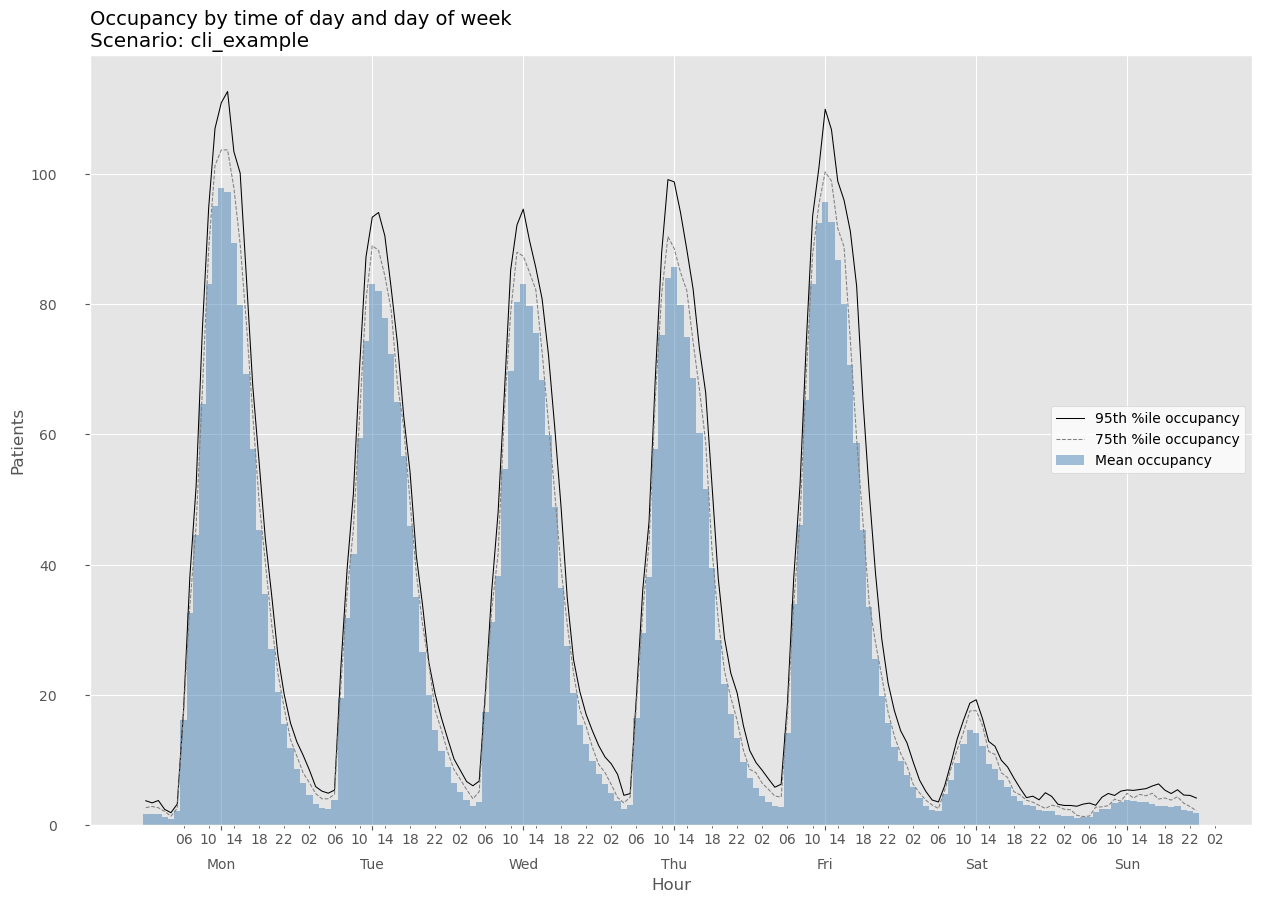

In [3]:
from IPython.display import Image
Image('output/cli_example_occupancy_week.png')

## Controlling plot creation

By default, all plots are automatically created and exported to `PLOT_EXPORT_PATH`. To suppress either the daily and/or weekly plots, use these arguments:

```bash
  --no_dow_plots        If set, no day of week plots are created.
  --no_week_plots       If set, no weekly plots are created.
```